In [240]:
import pandas as pd
import os

df = pd.read_csv('C:/Cand.merc.BI/2. Semester/Data Science Project/Project/BilbasenProject/data/data_analysis/clean_data.csv')

In [241]:
df.dtypes

Link                             object
Dealer_Private                     bool
Vehicle_type                     object
Make                             object
Model                            object
Price_kr                          int64
Model_year                        int64
Mileage_km                        int64
Range_km                        float64
BatteryCapacity_kWh             float64
Horsepower                        int64
Acceleration_0-100km/h_secs.    float64
Trailer_hitch                      bool
Color                            object
Drive_type                       object
dtype: object

We will take a look at the distributions of the numeric variables

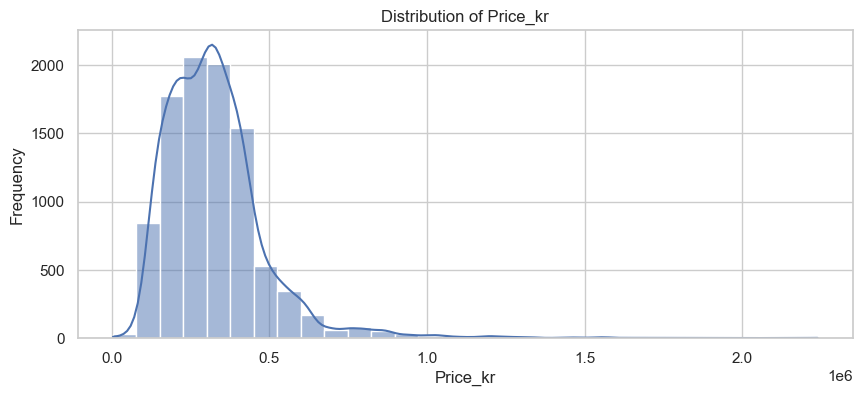

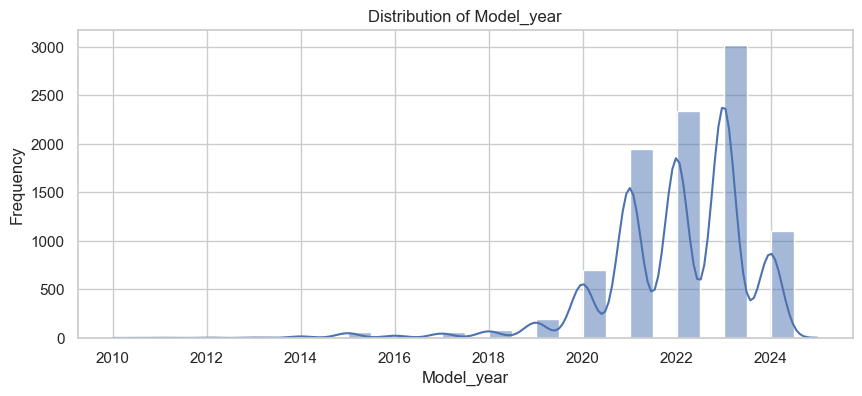

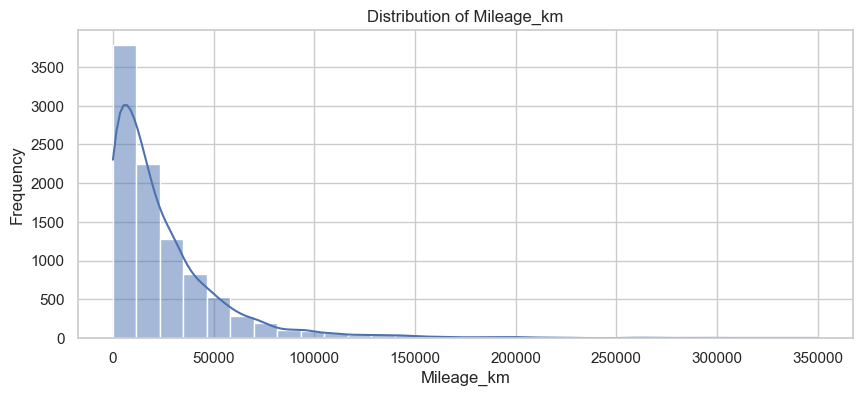

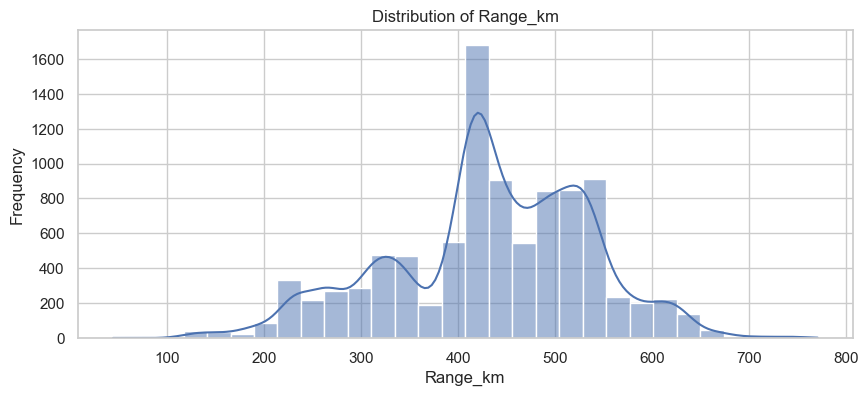

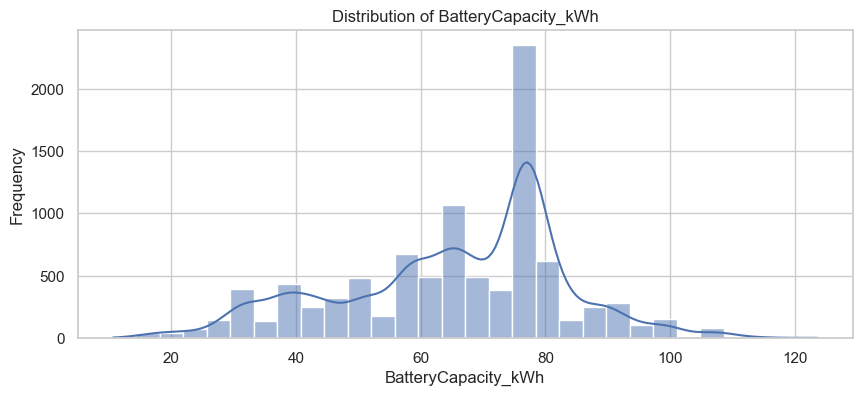

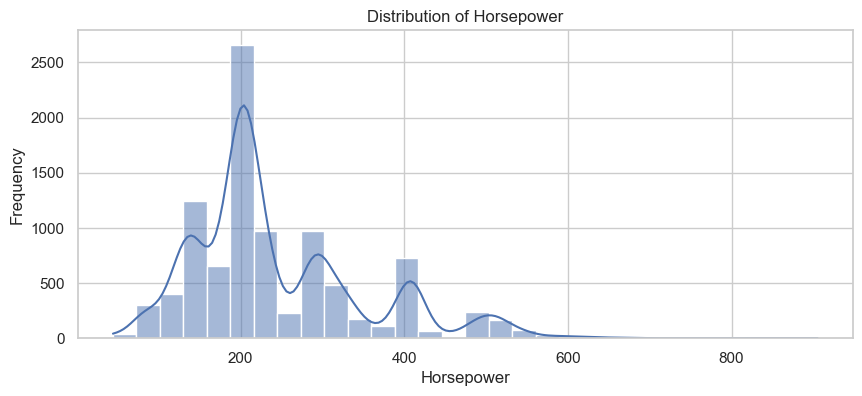

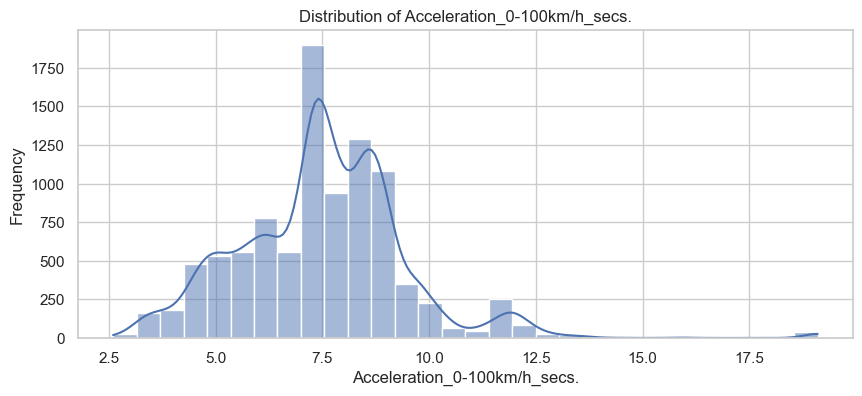

In [254]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# List of numerical variables
numerical_features = ['Price_kr', 'Model_year', 'Mileage_km', 'Range_km', 'BatteryCapacity_kWh', 'Horsepower', 'Acceleration_0-100km/h_secs.']

# Create a distribution plot for each numerical feature
for feature in numerical_features:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(f'{feature}')
    plt.ylabel('Frequency')
    plt.show()


It looks fine for most variables. but somthing looks off with the distribution of battery capacity. There are an observation with a very high value. 

In [243]:
df.sort_values(by='BatteryCapacity_kWh', ascending=False) # Tesla model 3 with battery of 903.0 kWh, must be a mistake. Delete it

,Link,Dealer_Private,Vehicle_type,Make,Model,Price_kr,Model_year,Mileage_km,Range_km,BatteryCapacity_kWh,Horsepower,Acceleration_0-100km/h_secs.,Trailer_hitch,Color,Drive_type
9427,https://www.bilbasen.dk/brugt/bil/tesla/model-...,False,Sedan,Tesla,MODEL-3,264995,2021,52000,614.0,903.0,498,4.4,True,Blå,AWD
7292,https://www.bilbasen.dk/brugt/bil/bmw/ix/xdriv...,True,SUV,Bmw,IX,529000,2023,19000,412.0,123.6,326,6.1,True,Sortmetal,AWD
2326,https://www.bilbasen.dk/brugt/bil/hongqi/e-hs9...,True,SUV,Hongqi,E-HS9,9595,2024,1,515.0,120.0,551,4.9,True,Beige,AWD
264,https://www.bilbasen.dk/brugt/bil/audi/q8-e-tr...,True,SUV,Audi,Q8-E-TRON,849900,2023,1200,557.0,114.0,408,5.9,True,Sortmetal,AWD
2409,https://www.bilbasen.dk/brugt/bil/audi/q8-e-tr...,True,SUV,Audi,Q8-E-TRON,849900,2024,1000,592.0,114.0,408,5.6,True,Blåmetal,AWD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5230,https://www.bilbasen.dk/brugt/bil/vw/e-up/high...,True,Mikro,Vw,E-UP,69990,2013,104000,160.0,16.0,82,12.4,False,Sølvmetal,FWD
6935,https://www.bilbasen.dk/brugt/bil/vw/e-up/high...,True,Mikro,Vw,E-UP,109700,2018,15000,160.0,16.0,82,12.4,False,Hvid,FWD
3995,https://www.bilbasen.dk/brugt/bil/peugeot/ion/...,True,Mikro,Peugeot,ION,64900,2012,32200,150.0,14.5,64,15.9,False,Blåmetal,RWD
4619,https://www.bilbasen.dk/brugt/bil/peugeot/ion/...,True,Mikro,Peugeot,ION,64900,2011,42533,150.0,14.5,64,15.9,False,Sort,RWD


In [244]:
df=df.drop(index=9427)

After running the distribution code again, Battery Capacity looks normal

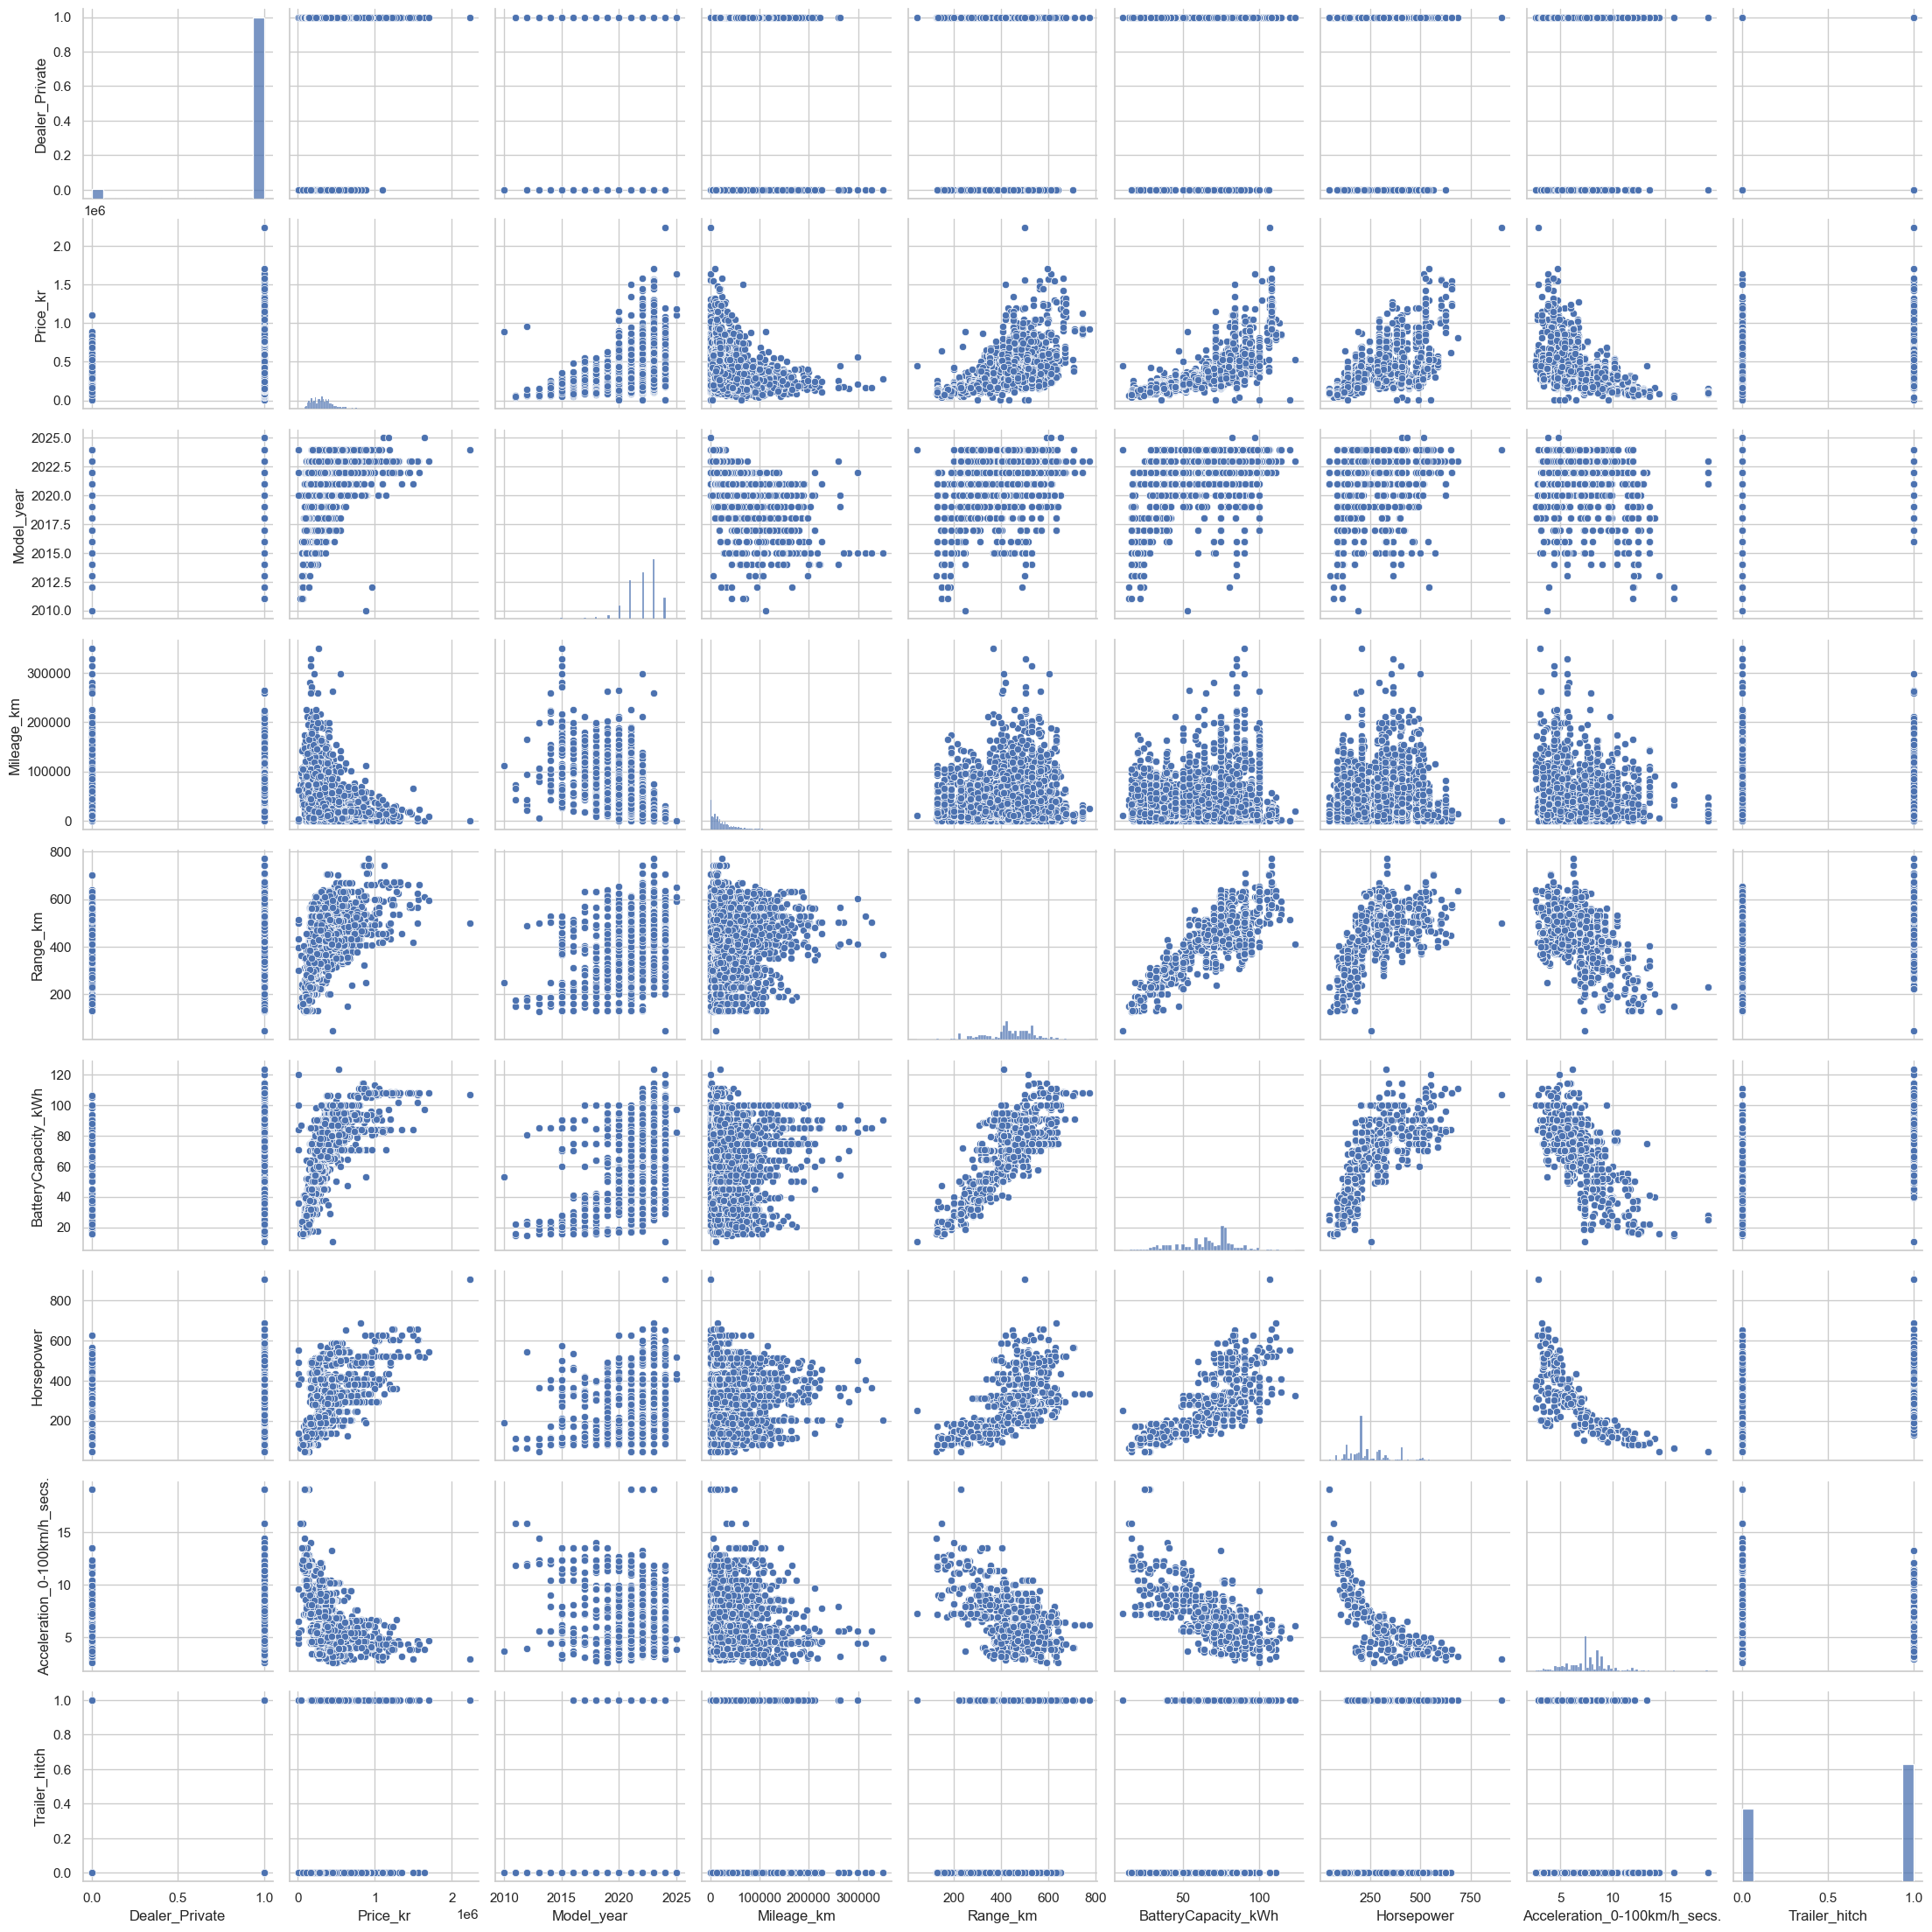

In [255]:
# library & dataset
import seaborn as sns
import matplotlib.pyplot as plt

# Basic correlogram
sns.pairplot(df)
plt.show()

In [246]:
df

,Link,Dealer_Private,Vehicle_type,Make,Model,Price_kr,Model_year,Mileage_km,Range_km,BatteryCapacity_kWh,Horsepower,Acceleration_0-100km/h_secs.,Trailer_hitch,Color,Drive_type
0,https://www.bilbasen.dk/brugt/bil/nissan/leaf/...,True,Halvkombi,Nissan,LEAF,199900,2024,3000,270.0,39.0,147,7.9,False,Sortmetal,FWD
1,https://www.bilbasen.dk/brugt/bil/mercedes/eqe...,True,Sedan,Mercedes,EQE350,569900,2023,1100,610.0,89.0,292,6.3,True,Sølvmetal,AWD
2,https://www.bilbasen.dk/brugt/bil/volvo/xc40/r...,True,SUV,Volvo,XC40,455555,2024,1001,536.0,82.0,408,4.9,True,Gråmetal,AWD
3,https://www.bilbasen.dk/brugt/bil/renault/scen...,True,CUV,Renault,SCENIC-E-TECH,329990,2024,0,420.0,60.0,170,8.6,True,Rødmetal,FWD
4,https://www.bilbasen.dk/brugt/bil/peugeot/e-20...,True,CUV,Peugeot,E-2008,299900,2023,2000,403.0,54.0,156,8.5,False,Gråmetal,FWD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9585,https://www.bilbasen.dk/brugt/bil/polestar/2/l...,False,Halvkombi,Polestar,2,289000,2021,90000,469.0,78.0,408,4.7,True,Grå,AWD
9586,https://www.bilbasen.dk/brugt/bil/bmw/i4/edriv...,False,Halvkombi,Bmw,I4,385000,2023,11000,450.0,66.0,286,6.0,True,Grå,RWD
9587,https://www.bilbasen.dk/brugt/bil/hyundai/ioni...,False,Halvkombi,Hyundai,IONIQ,109900,2017,90000,280.0,28.0,120,9.9,False,Hvid,FWD
9588,https://www.bilbasen.dk/brugt/bil/mercedes/eqc...,False,SUV,Mercedes,EQC400,440000,2020,85000,410.0,80.0,408,5.1,True,Blåmetal,AWD


In [247]:
# Identifying categorical features
categorical_features = df.select_dtypes(include=['object', 'bool']).columns

# Create an overview of each categorical feature
for feature in categorical_features:
    print(f"--- {feature} ---")
    print(f"Unique Values: {df[feature].nunique()}")
    print(f"Value Counts:")
    print(df[feature].value_counts())
    print("\n")


--- Link ---
Unique Values: 9589
Value Counts:
Link
https://www.bilbasen.dk/brugt/bil/nissan/leaf/39-n-connecta-5d/6127240     1
https://www.bilbasen.dk/brugt/bil/mercedes/eqv300/avantgarde-l/6155419     1
https://www.bilbasen.dk/brugt/bil/vw/id5/pro-performance-5d/6133680        1
https://www.bilbasen.dk/brugt/bil/mercedes/eqe350/amg-line-4d/6028339      1
https://www.bilbasen.dk/brugt/bil/mg/4/luxury-5d/6125441                   1
                                                                          ..
https://www.bilbasen.dk/brugt/bil/mercedes/eqv300/avantgarde-l/6153879     1
https://www.bilbasen.dk/brugt/bil/vw/e-up/5d/6120717                       1
https://www.bilbasen.dk/brugt/bil/vw/id4/pro-performance-1st-5d/6150056    1
https://www.bilbasen.dk/brugt/bil/tesla/model-3/rwd-4d/6138553             1
https://www.bilbasen.dk/brugt/bil/mini/cooper-se/experience-3d/5945172     1
Name: count, Length: 9589, dtype: int64


--- Dealer_Private ---
Unique Values: 2
Value Counts:
Deale

Some Feature Engineering:
Lumping of categorical Values

In [248]:
df

,Link,Dealer_Private,Vehicle_type,Make,Model,Price_kr,Model_year,Mileage_km,Range_km,BatteryCapacity_kWh,Horsepower,Acceleration_0-100km/h_secs.,Trailer_hitch,Color,Drive_type
0,https://www.bilbasen.dk/brugt/bil/nissan/leaf/...,True,Halvkombi,Nissan,LEAF,199900,2024,3000,270.0,39.0,147,7.9,False,Sortmetal,FWD
1,https://www.bilbasen.dk/brugt/bil/mercedes/eqe...,True,Sedan,Mercedes,EQE350,569900,2023,1100,610.0,89.0,292,6.3,True,Sølvmetal,AWD
2,https://www.bilbasen.dk/brugt/bil/volvo/xc40/r...,True,SUV,Volvo,XC40,455555,2024,1001,536.0,82.0,408,4.9,True,Gråmetal,AWD
3,https://www.bilbasen.dk/brugt/bil/renault/scen...,True,CUV,Renault,SCENIC-E-TECH,329990,2024,0,420.0,60.0,170,8.6,True,Rødmetal,FWD
4,https://www.bilbasen.dk/brugt/bil/peugeot/e-20...,True,CUV,Peugeot,E-2008,299900,2023,2000,403.0,54.0,156,8.5,False,Gråmetal,FWD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9585,https://www.bilbasen.dk/brugt/bil/polestar/2/l...,False,Halvkombi,Polestar,2,289000,2021,90000,469.0,78.0,408,4.7,True,Grå,AWD
9586,https://www.bilbasen.dk/brugt/bil/bmw/i4/edriv...,False,Halvkombi,Bmw,I4,385000,2023,11000,450.0,66.0,286,6.0,True,Grå,RWD
9587,https://www.bilbasen.dk/brugt/bil/hyundai/ioni...,False,Halvkombi,Hyundai,IONIQ,109900,2017,90000,280.0,28.0,120,9.9,False,Hvid,FWD
9588,https://www.bilbasen.dk/brugt/bil/mercedes/eqc...,False,SUV,Mercedes,EQC400,440000,2020,85000,410.0,80.0,408,5.1,True,Blåmetal,AWD


In [249]:
# Replace variations of 'Hvid' color
df['Color'] = df['Color'].replace(r'\b(Hvidmetal|Perlemorshvid)\b', 'Hvid', regex=True)

# Replace variations of 'Grå' color
df['Color'] = df['Color'].replace(r'\b(Gråmetal|Koksmetal|Koks|Mørkgrå)\b', 'Grå', regex=True)

# Replace variations of 'Sort' color
df['Color'] = df['Color'].replace(r'\b(Sortmetal|Carbonsortmetal)\b', 'Sort', regex=True)

# Replace variations of 'Blå' color
df['Color'] = df['Color'].replace(r'\b(Blåmetal|Mørkblåmetal|Mørkblå|Lysblå|Lysblåmetal)\b', 'Blå', regex=True)

# Replace variations of 'Sølv' color
df['Color'] = df['Color'].replace(r'\b(Sølvmetal)\b', 'Sølv', regex=True)

# Replace variations of 'Rød' color
df['Color'] = df['Color'].replace(r'\b(Rødmetal|Mørkrødmetal)\b', 'Rød', regex=True)

# Replace variations of 'Grøn' color
df['Color'] = df['Color'].replace(r'\b(Grønmetal|Mørkgrøn|Mørkgrønmetal|Lysgrønmetal|Lysgrøn)\b', 'Grøn', regex=True)

# Replace variations of 'Beige' color
df['Color'] = df['Color'].replace(r'\b(Champagnemetal|Beigemetal)\b', 'Beige', regex=True)

# Replace variations of 'Gul' color
df['Color'] = df['Color'].replace(r'\b(Gulmetal|Guldmetal)\b', 'Gul', regex=True)

# Replace variations of 'Brun' color
df['Color'] = df['Color'].replace(r'\b(Brunmetal|Bronzemetal|Kobbermetal|Metal)\b', 'Brun', regex=True)

# Replace variations of 'Orange' color
df['Color'] = df['Color'].replace(r'\b(Orangemetal)\b', 'Orange', regex=True)


In [250]:
# Replace multiple color categories with a single category in one line
df['Color'] = df['Color'].replace(r'\b(Gul|Brun|Orange)\b', 'Gul_Brun_Orange', regex=True)

In [251]:
#Lumping the rest of the colors
df['Color'] = df['Color'].replace(r'\b(Turkismetal|Lillametal|Bordeauxmetal|Lyserødmetal|Lilla|Turkis|Violetmetal|Bordeaux|Violet)\b', 'Special', regex=True)

In [264]:
df['Model'].value_counts()

Model
ID4               534
ID3               483
MODEL-3           442
ENYAQ             392
2                 336
                 ... 
EQE53               1
HAN                 1
RS-E-TRON-GT        1
DUCATO-35-MAXI      1
FORTWO-CABRIO       1
Name: count, Length: 138, dtype: int64

In [259]:
df

,Link,Dealer_Private,Vehicle_type,Make,Model,Price_kr,Model_year,Mileage_km,Range_km,BatteryCapacity_kWh,Horsepower,Acceleration_0-100km/h_secs.,Trailer_hitch,Color,Drive_type
0,https://www.bilbasen.dk/brugt/bil/nissan/leaf/...,True,Halvkombi,Nissan,LEAF,199900,2024,3000,270.0,39.0,147,7.9,False,Sort,FWD
1,https://www.bilbasen.dk/brugt/bil/mercedes/eqe...,True,Sedan,Mercedes,EQE350,569900,2023,1100,610.0,89.0,292,6.3,True,Sølv,AWD
2,https://www.bilbasen.dk/brugt/bil/volvo/xc40/r...,True,SUV,Volvo,XC40,455555,2024,1001,536.0,82.0,408,4.9,True,Grå,AWD
3,https://www.bilbasen.dk/brugt/bil/renault/scen...,True,CUV,Renault,SCENIC-E-TECH,329990,2024,0,420.0,60.0,170,8.6,True,Rød,FWD
4,https://www.bilbasen.dk/brugt/bil/peugeot/e-20...,True,CUV,Peugeot,E-2008,299900,2023,2000,403.0,54.0,156,8.5,False,Grå,FWD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9585,https://www.bilbasen.dk/brugt/bil/polestar/2/l...,False,Halvkombi,Polestar,2,289000,2021,90000,469.0,78.0,408,4.7,True,Grå,AWD
9586,https://www.bilbasen.dk/brugt/bil/bmw/i4/edriv...,False,Halvkombi,Bmw,I4,385000,2023,11000,450.0,66.0,286,6.0,True,Grå,RWD
9587,https://www.bilbasen.dk/brugt/bil/hyundai/ioni...,False,Halvkombi,Hyundai,IONIQ,109900,2017,90000,280.0,28.0,120,9.9,False,Hvid,FWD
9588,https://www.bilbasen.dk/brugt/bil/mercedes/eqc...,False,SUV,Mercedes,EQC400,440000,2020,85000,410.0,80.0,408,5.1,True,Blå,AWD


In [274]:
pd.options.display.max_rows = None
df['Make'].value_counts()

Make
Vw          1698
Mercedes     970
Tesla        724
Bmw          603
Audi         576
Volvo        483
Kia          477
Hyundai      453
Skoda        416
Polestar     336
Fiat         291
Renault      261
Nissan       251
Peugeot      249
Mg           230
Cupra        226
Opel         218
Ford         194
Mini         190
Porsche       91
Aiways        83
Byd           72
Citron        69
Mazda         61
Maxus         56
Toyota        56
Jaguar        39
Dacia         38
Seat          33
Smart         23
Ds            20
Jeep          19
Jac           16
Hongqi        13
Lexus         12
Honda         10
Fisker         9
Lotus          9
Voyah          5
Subaru         4
Seres          2
Abarth         2
Xpeng          1
Name: count, dtype: int64

In [275]:
#df.to_csv('C:/Cand.merc.BI/2. Semester/Data Science Project/Project/BilbasenProject/data/data_analysis/engineered_data.csv', index=False)